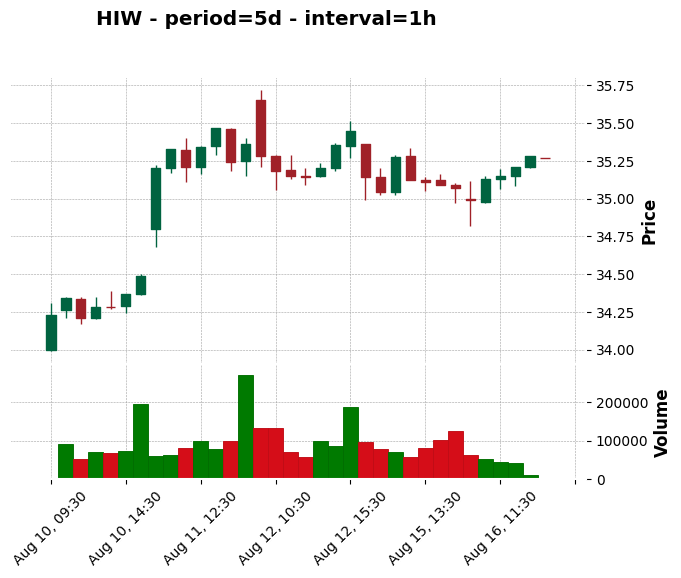

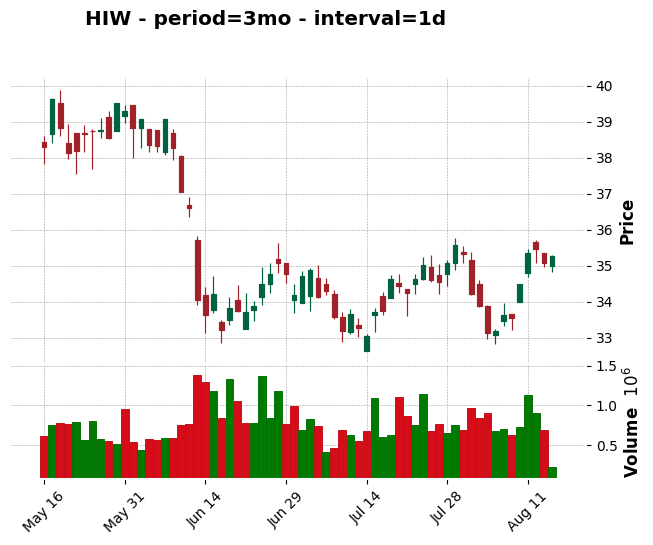

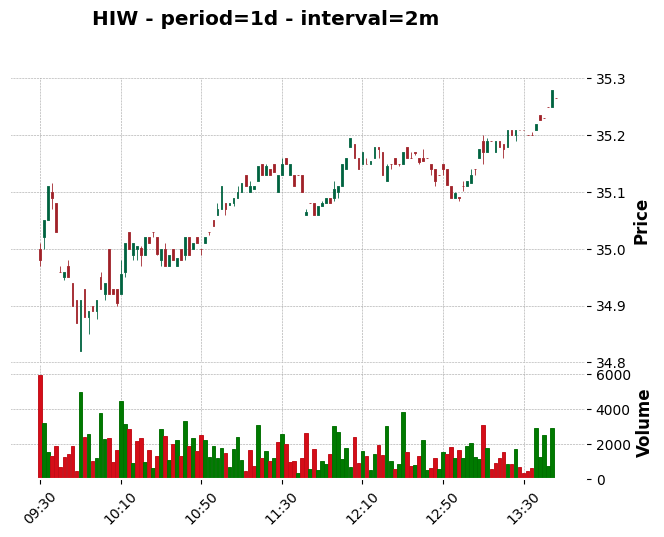

In [206]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import pprint
import datetime
import requests
from bs4 import BeautifulSoup

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

ticker = "aapl"
yticker = yf.Ticker(ticker)
def plotprices(ticker,interval:str,period:str):
    #ticker = "hln"
    #interval = "1h" # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    #period = "1y" # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    
    df = ticker.history(period=period,interval=interval) # max, 1y, 3mo, etc
    #yticker = yf.Ticker(ticker)
    mpf.plot(df, type='candle', style='charles', volume=True,title="{} - period={} - interval={}".format(ticker.ticker, period, interval))

plotprices(yticker,'1h','5d')
plotprices(yticker,'1d','3mo')
plotprices(yticker,'2m','1d')
#yticker.info['symbol']
#yticker.ticker

In [201]:
def get_exdividend(yticker):
    stock_info = yticker.info
    if 'exDividendDate' in stock_info.keys():
        #print("found exdividend key")
        if stock_info['exDividendDate'] is not None:
            #print('exdividend is not none')
            if datetime.datetime.fromtimestamp(stock_info['exDividendDate']).date() >= datetime.datetime.today().date():
                #print("exdividend day not in past")
                #print(i+stock_info['exDividendDate'])
                date = datetime.datetime.fromtimestamp(stock_info['exDividendDate'])
                #date = date.date().isoformat()
                date = date.date()
                #print(yticker.ticker+" exdividend: "+date)
                return date
        else:
            print("ex dividend is None")
exdate = get_exdividend(yticker)
if exdate != None:
    print('Exdata: '+exdate.isoformat())
#test if exdiv in next week
    if (exdate - datetime.date.today()).days <= 7:
        print(bcolors.WARNING + "Warning exdata this week!!!")
    else:
        print('No exdata next week')   


In [204]:
#add calendar check
yticker.calendar

<bound method NDFrame._add_numeric_operations.<locals>.all of                                     0                    1
Earnings Date     2017-02-01 15:59:00  2017-02-06 17:00:00
Earnings Average                 1.02                 1.02
Earnings Low                     1.02                 1.02
Earnings High                    1.02                 1.02
Revenue Average            8555630000           8555630000
Revenue Low                8402700000           8402700000
Revenue High               8708560000           8708560000>

In [202]:
def get_news(yticker):
    news = yticker.news
    for i in news:
        print(i['title'],i['link'],datetime.datetime.fromtimestamp((i['providerPublishTime'])))  
get_news(yticker)

Pharma companies see sales slump amid ongoing Zantac litigation https://finance.yahoo.com/video/pharma-companies-see-sales-slump-200947822.html 2022-08-12 23:09:47
GSK/Sanofi: Zantac tussle may be long and painful, precedents show https://finance.yahoo.com/m/fad51c81-4bd8-3db6-a600-ffceca3b460e/gsk%2Fsanofi%3A-zantac-tussle-may.html 2022-08-12 18:20:12
Why Pfizer Stock Slipped Today https://finance.yahoo.com/m/4fe52a99-2d18-3829-8e9b-444e5b86da3d/why-pfizer-stock-slipped-today.html 2022-08-12 00:26:14
Pharma Stocks GSK, Sanofi And Haleon Lose Billions As Zantac Trial Looms https://finance.yahoo.com/m/eff5acc0-ef02-391e-b868-d6fd83bec75a/pharma-stocks-gsk%2C-sanofi-and.html 2022-08-11 23:16:35
Fed Isn’t Popping Champagne (Capital Market Research) (Weekly Market Outlook) https://finance.yahoo.com/news/fed-isn-t-popping-champagne-190110287.html 2022-08-11 22:01:10
Why GSK Is So Deep in the Red Today https://finance.yahoo.com/m/a45018e5-1bae-3691-a008-a91678c4b84e/why-gsk-is-so-deep-in-the

In [65]:
#add finance check
